**Time Series forecasting using Python.**
 
Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

Time series are widely used for non-stationary data, like economic, weather, stock price,retail sales etc. Here we are trying to forecast the upcomming number of Covid-19 postitive cases in india.

In [0]:
import pandas as pd
df = pd.read_csv('http://api.covid19india.org/states_daily_csv/confirmed.csv',parse_dates=['date'],index_col='date')
df.tail()

,TT,AN,AP,AR,AS,BR,CH,CT,DD,DL,DN,GA,GJ,HP,HR,JH,JK,KA,KL,LA,LD,MH,ML,MN,MP,MZ,NL,OR,PB,PY,RJ,SK,TG,TN,TR,UP,UT,WB,Unnamed: 39
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-14,1035,0,45,0,1,0,0,2,0,51,0,0,78,1,2,3,8,13,8,0,0,350,0,0,127.0,0,0,5,8,0,108,0,52,31,0,102,2,38,NaN
2020-04-15,882,0,41,0,0,6,0,0,0,17,0,0,116,2,6,1,22,19,1,1,0,232,6,0,197.0,0,0,0,2,0,71,0,6,38,0,75,0,23,NaN
2020-04-16,1062,0,9,0,2,11,0,3,0,62,0,0,163,0,11,1,14,36,7,0,0,286,2,0,226.0,0,0,0,11,0,55,0,50,25,0,70,0,18,NaN
2020-04-17,920,1,38,0,0,2,0,0,0,67,0,0,170,3,8,3,14,44,1,0,0,118,0,0,146.0,0,0,0,14,0,98,0,66,56,0,44,3,24,NaN
2020-04-18,1370,2,31,0,0,1,2,0,0,186,0,0,277,1,9,0,13,25,4,0,0,328,2,0,92.0,0,0,1,23,0,122,0,43,49,0,125,2,32,NaN


Here we are using data provided through API 'http://api.covid19india.org/states_daily_csv/confirmed.csv' . You can put this link into your web browser to have a look. 

We are importing this CSV file using pandas and setting index column as 'date' because the values will be forecasted according to this values.

Data is stored in variable 'df'. **df.head()** shows first 5 rows of the file whereas **df.tail()** shows last 5.

In [0]:
#cols = ['AN','AP',	'AR',	'AS',	'BR',	'CH',	'CT',	'DD',	'DL',	'DN',	'GA',	'GJ',	'HP',	'HR',	'JH', 'JK',	'KA',	'KL',	'LA',	'LD',	'MH',	'ML',	'MN',	'MP',	'MZ',	'NL',	'OR',	'PB',	'PY',	'RJ',	'SK',	'TG',	'TN',	'TR',	'UP',	'UT',	'WB']
#df.drop(cols, axis=1, inplace=True)

As we can see above, the file contains a 'date' column followed by a 'TT' which shows total number of confirmed cases on that perticular date. This is followed by statewise data.

Here we are only intrested in total confirmed cases, so we can remove all state wise data. We can take names of all columns in a list. 

Using **df.drop()** we can drop columns, by passing cols as arguments.
**axis** argument gives data about what we need to drop. **axis =0** stands for rows whereas **axis = 1** stands fror column.

**inplace** tells wether the changes should be made to orignal df or not.

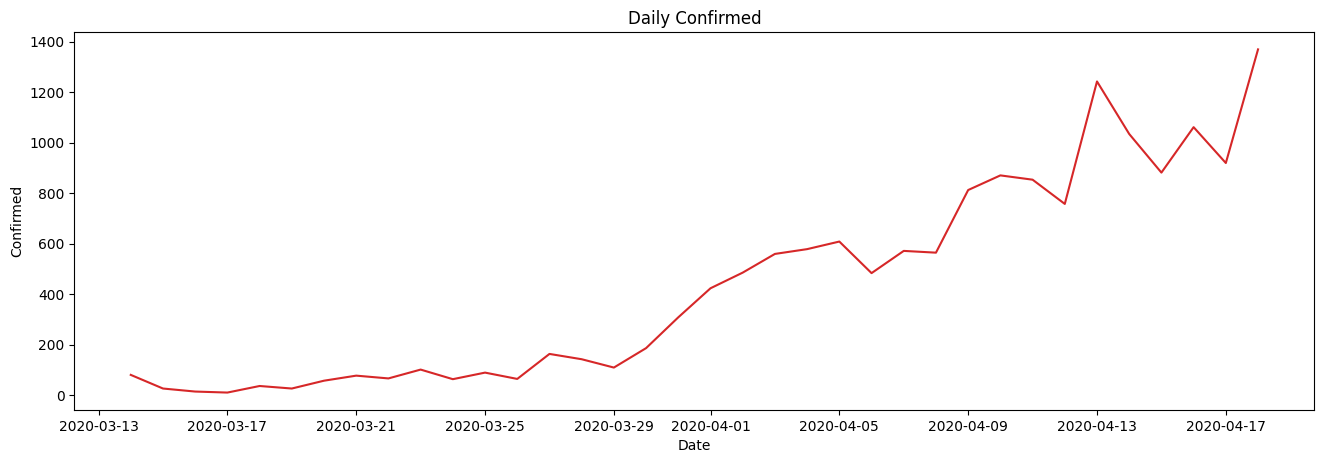

In [0]:
import matplotlib.pyplot as plt

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Confirmed', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.TT, title='Daily Confirmed') 

Now before forecasting, first lets polt what we already have. We will use matplotlib's pyplot to plot our data. 

Lets create a function plot_df to do our work. Arguments passed are :

**df** - our dataframe

**x and y** -  values of x axis and y axis respectively. Here our values for x axis is **df.index** ( remember, we made 'date' column as index column above ) and for y axis is **df.TT** which is TT column of our dataframe.

**xlabel and ylabel** - there are labels for our x and y axis respectively.

**dpi** - used to set size of our graph ( try altering it by yourself ).

**plt.gca()** - gca stands for 'get current axis' , plt. gca() to get a reference to the current axes, if you need to change the limits on the y-axis. **.set** method on gca is used to set x and y axis labels and titles .

**plt.show** - displays the plotted graph.

In [0]:
from statsmodels.tsa.arima_model import ARIMA

TT = df['TT']
model = ARIMA(TT, order=(2,0,1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df), len(df))
print(yhat)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ValueError: ignored

Here we are using **ARIMA** model for forecasting.

The Autoregressive Integrated Moving Average (ARIMA) method, It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

*   AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
*   I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
*   MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

**Read different types of forecasting methods :** https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/


The result of prediction is stored in variable 'yhat'.

**ARIMA takes two arguments** 

**First** is the column whose value is to be forecasted. In our case it is 'TT' column of our data frame.

**Second** argument is a tuple named 'order'. It takes three values :


*   **p:** The number of lag observations included in the model, also called the lag order.
*   **d:** The number of times that the raw observations are differenced, also called the degree of differencing.
*   **q:** The size of the moving average window, also called the order of moving average.






In [0]:
yhat

Displaying content of 'yhat' shows date and prediction.
Hence according to our model, around 938.55 cases will be repored on 2020-04-16.

In [0]:
'''p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq'''

In [0]:
'''mod = ARIMA(TT, order=(0,0,0))
res = mod.fit()
print(res.aic)
mod = ARIMA(TT, order=(0,0,1))
res = mod.fit()
print(res.aic)
mod = ARIMA(TT, order=(0,1,0))
res = mod.fit()
print(res.aic)
mod = ARIMA(TT, order=(1,0,0))
res = mod.fit()
print(res.aic)'''

In [0]:
for p in range(6):
  for d in range(2):
    for q in range(2):
      if not((p == 1 and d == 1 and q == 1) or (p == 3 and d == 0 and q == 1) or (p == 4 and d == 1 and q == 1)):
        mod = ARIMA(TT, order=(p,d,q))
        res = mod.fit()
        print('AIC for {} {} {} is {}'.format(p,d,q,res.aic))

The Akaike Information Critera (**AIC**) is a widely used measure of a statistical model. ... When comparing two models, the one with the **lower AIC is generally “better”. **

Here we have found **AIC** for all the possible pairs of p,d,q.

In [0]:
import datetime
from datetime import timedelta

start_date = datetime.date.today()
td2 = timedelta(days = 1)
td1 = timedelta(days = 7)



p = model_fit.plot_predict(start=pd.to_datetime(start_date+td2),end=pd.to_datetime(start_date+td1), dynamic=False)

In [0]:
start_date+td2

Now lets forecaste data for 7 upcoming days.

We will use **plot_predict** method which will also plot grapg for us along with predicting values. 

We are here using datetime library of python. **Start date** is set to today . Timedelta is used to do addition and substractions on date and times. Here we have declared an object td as timedelta with argument **date=7**. **start_date+td** gives us 2020-04-16+ 7 days = 2020-04-23

In [0]:
pred = model_fit.predict(start=pd.to_datetime(start_date+td2),end=pd.to_datetime(start_date+td1), dynamic=False)
pred

Lets have a look at our values. Only thing we have to do is fit our model with **predict** method rather than **plot_predict** method.

In [0]:
bar = plt.barh(pred.index,pred,animated=True,snap= True)

Now we can use the data available with us in any way we want.

Here we have ploted a horizontal bar graph with our data.